#### Adicionando o caminho do projeto ao path

In [97]:
import os
os.chdir('/Users/edithvidal/Documents/Github/data_science_analysis/')

#### Instalando sklearn

In [98]:
%pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [161]:
%pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Importando as bibliotecas necessárias

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder

#### Lendo dados da base após análise

In [168]:
df_accidents = pd.read_csv(
    "analysis/datatran2018_2024_v3.csv",
    parse_dates=["mes_ano"]
)
df_accidents.info()
df_accidents.reset_index(drop=True, inplace=True)

/var/folders/z1/3syxl8gd5ks431s8c9n9mrs00000gn/T/ipykernel_29502/2452157731.py:1: DtypeWarning: Columns (0,2,3,4,5,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467078 entries, 0 to 467077
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   tipo_data               429733 non-null  object        
 1   mes_ano                 467078 non-null  datetime64[ns]
 2   dia_semana              429733 non-null  object        
 3   fase_dia                429733 non-null  object        
 4   condicao_metereologica  429733 non-null  object        
 5   uf                      429733 non-null  object        
 6   br                      429733 non-null  float64       
 7   uso_solo                429733 non-null  object        
 8   tipo_pista              429733 non-null  object        
 9   sentido_via             429733 non-null  object        
 10  tipo_acidente           429733 non-null  object        
 11  causa_acidente          429733 non-null  object        
 12  classificacao_acidente  429733

#### Removendo colunas que não serão utilizadas para a classificação

In [170]:
df = df_accidents.copy()
df.drop(columns=[
    "mes_ano",
    "tipo_data",
    "classificacao_acidente",
    "pessoas",
    "veiculos"
], inplace=True)

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429733 entries, 0 to 429732
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dia_semana              429733 non-null  object 
 1   fase_dia                429733 non-null  object 
 2   condicao_metereologica  429733 non-null  object 
 3   uf                      429733 non-null  object 
 4   br                      429733 non-null  float64
 5   uso_solo                429733 non-null  object 
 6   tipo_pista              429733 non-null  object 
 7   sentido_via             429733 non-null  object 
 8   tipo_acidente           429733 non-null  object 
 9   causa_acidente          429733 non-null  object 
dtypes: float64(1), object(9)
memory usage: 36.1+ MB


In [ ]:
from sklearn.metrics import classification_report

X = df.drop("tipo_acidente", axis=1)
Y = df["tipo_acidente"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.30,
    random_state=42
)

# Pipeline com TargetEncoder
pipeline = Pipeline(steps=[
    ('target_encoder', TargetEncoder()),  # Aplica sobre todas as colunas
    ('classifier', DecisionTreeClassifier(
        max_depth=2,
        min_samples_leaf=5,
        criterion="gini",
        random_state=43
    ))
])

# Treinar
pipeline.fit(X_train, Y_train)

# Prever
y_pred = pipeline.predict(X_test)

# Avaliando
print(classification_report(Y_test, y_pred))

/Users/edithvidal/Documents/Github/data_science_analysis/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/edithvidal/Documents/Github/data_science_analysis/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                 precision    recall  f1-score   support

        Atropelamento de animal       0.00      0.00      0.00      2173
      Atropelamento de pedestre       0.94      0.63      0.75      5949
                    Capotamento       0.00      0.00      0.00      3732
             Colisão com objeto       0.00      0.00      0.00      4993
Colisão com objeto em movimento       0.00      0.00      0.00       295
    Colisão com objeto estático       0.00      0.00      0.00      4290
                Colisão frontal       0.00      0.00      0.00      8575
                Colisão lateral       0.00      0.00      0.00      7342
  Colisão lateral mesmo sentido       0.00      0.00      0.00      7026
 Colisão lateral sentido oposto       0.00      0.00      0.00      1949
            Colisão transversal       0.32      0.65      0.43     16285
               Colisão traseira       0.23      0.86      0.36     24386
                Danos eventuais       0.00      0.

/Users/edithvidal/Documents/Github/data_science_analysis/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [176]:
tree_model = pipeline.named_steps['classifier']
tree_model

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=43)

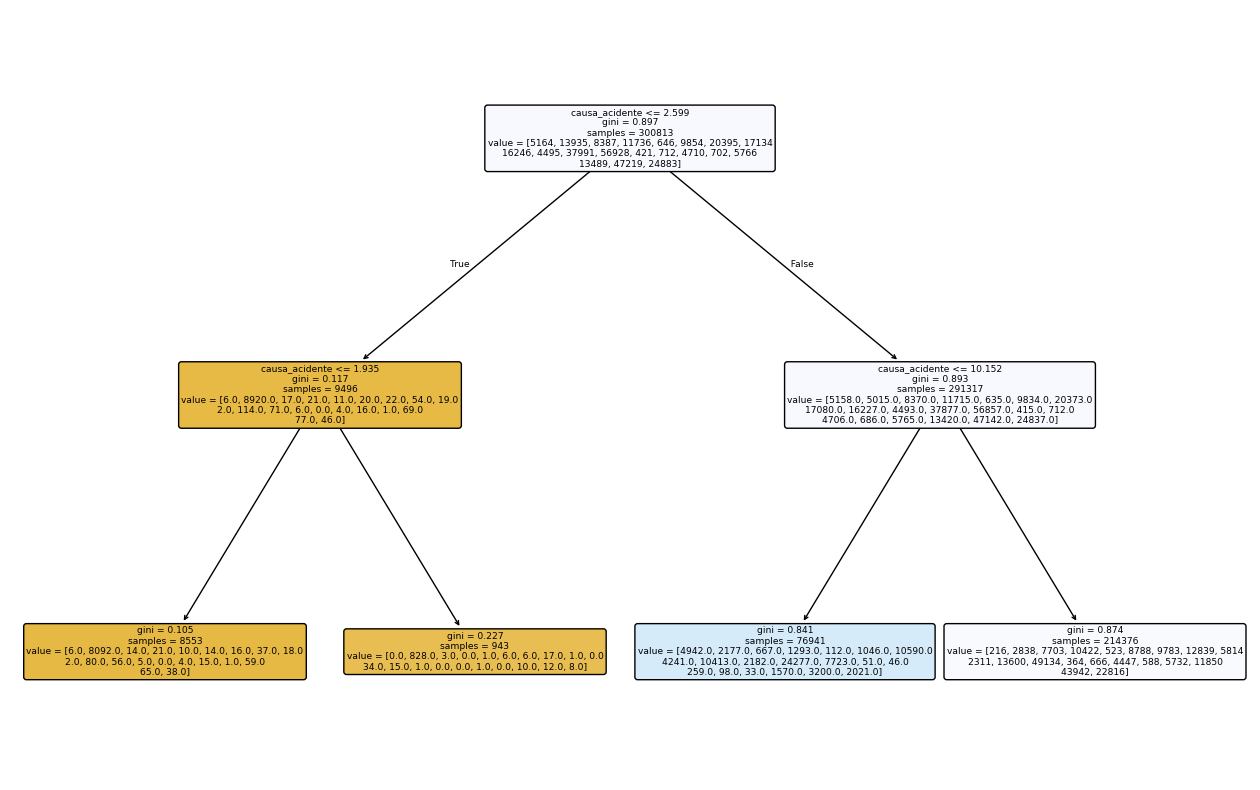

In [178]:
categorical_features = [
    "dia_semana",
    "fase_dia",
    "mes_ano",
    "condicao_metereologica",
    "uf",
    "uso_solo",
    "tipo_pista",
    "sentido_via",
    "causa_acidente",
]

plt.figure(figsize=(16, 10))
plot_tree(tree_model,
          feature_names=categorical_features,
          filled=True,
          rounded=True)
plt.show()

#### Tratando as colunas para int ou float

#### Separando o X

In [157]:
X = df.drop("tipo_acidente", axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429733 entries, 0 to 429732
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   mes_ano                 429733 non-null  datetime64[ns]
 1   dia_semana              429733 non-null  object        
 2   fase_dia                429733 non-null  object        
 3   condicao_metereologica  429733 non-null  object        
 4   uf                      429733 non-null  object        
 5   br                      429733 non-null  float64       
 6   uso_solo                429733 non-null  object        
 7   tipo_pista              429733 non-null  object        
 8   sentido_via             429733 non-null  object        
 9   causa_acidente          429733 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 36.1+ MB


#### Separando o Y

In [158]:
Y = df["tipo_acidente"]
Y

0         Saída de leito carroçável
1                  Colisão traseira
2                     Engavetamento
3                   Colisão lateral
4                  Colisão traseira
                    ...            
429728             Colisão traseira
429729                   Tombamento
429730                     Incêndio
429731             Colisão traseira
429732                     Incêndio
Name: tipo_acidente, Length: 429733, dtype: object

In [159]:
categorical_features = [
    "dia_semana",
    "fase_dia",
    "mes_ano",
    "condicao_metereologica",
    "uf",
    "uso_solo",
    "tipo_pista",
    "sentido_via",
    "causa_acidente",
]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['dia_semana', 'fase_dia', 'mes_ano',
                                  'condicao_metereologica', 'uf', 'uso_solo',
                                  'tipo_pista', 'sentido_via',
                                  'causa_acidente'])])

#### Separando a base em 30% para teste e 70% para treino

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.30,
    random_state=42
)

In [ ]:
dstree = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=5,
    criterion="gini",
    random_state=43
)

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', dstree)
# ])

In [135]:
# Pegue o OneHotEncoder dentro do ColumnTransformer
encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']

# Pegue os nomes transformados
encoded_feature_names = encoder.get_feature_names_out(categorical_features)


In [149]:
dstree.fit(X_train, Y_train)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

#### Ajuste do modelo

In [137]:
Y_train_pred = pipeline.predict(X_train)
Y_test_pred  = pipeline.predict(X_test)

In [138]:
#Calculo da acurácia do treino
train_accuracy = accuracy_score(Y_train, Y_train_pred)

#Calculo da acurácia do teste
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print('% Acertos treino:', train_accuracy)
print('% Acertos teste:', test_accuracy)

% Acertos treino: 0.23299524954041215
% Acertos teste: 0.2337651256593236


In [147]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

# confusion_matrix0 = metrics.confusion_matrix(Y_train, Y_train_pred)
cm = ConfusionMatrixDisplay.from_estimator(dstree, X_test, Y_test)

print(cm)

/Users/edithvidal/Documents/Github/data_science_analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [140]:
X_train.count()

mes_ano                   300813
dia_semana                300813
fase_dia                  300813
condicao_metereologica    300813
uf                        300813
br                        300813
uso_solo                  300813
tipo_pista                300813
sentido_via               300813
causa_acidente            300813
dtype: int64

In [143]:
tree_model = pipeline.named_steps['classifier']

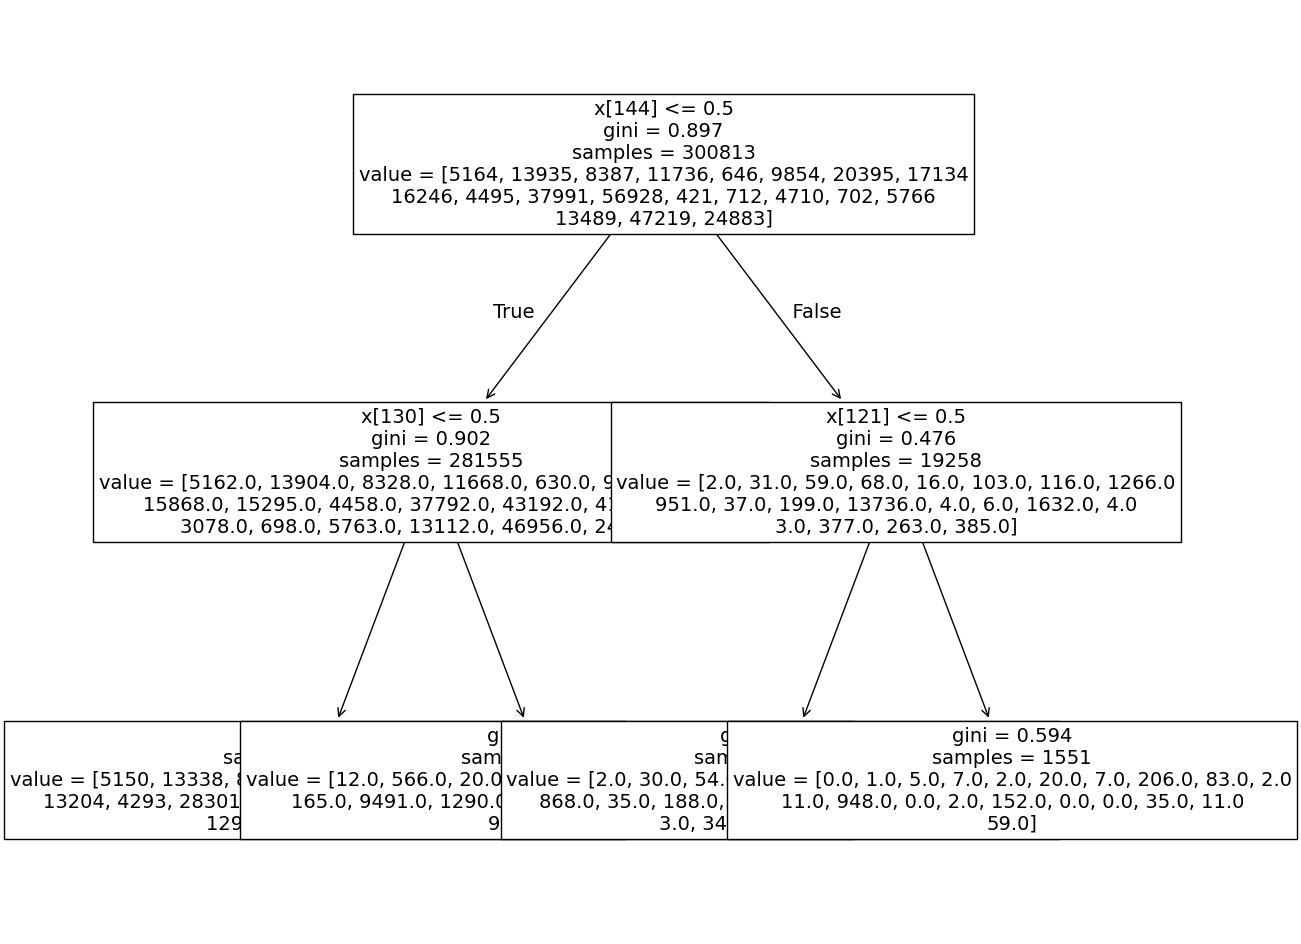

In [144]:
plt.figure(figsize=(12,12))
tree.plot_tree(tree_model, fontsize=14)
plt.show()

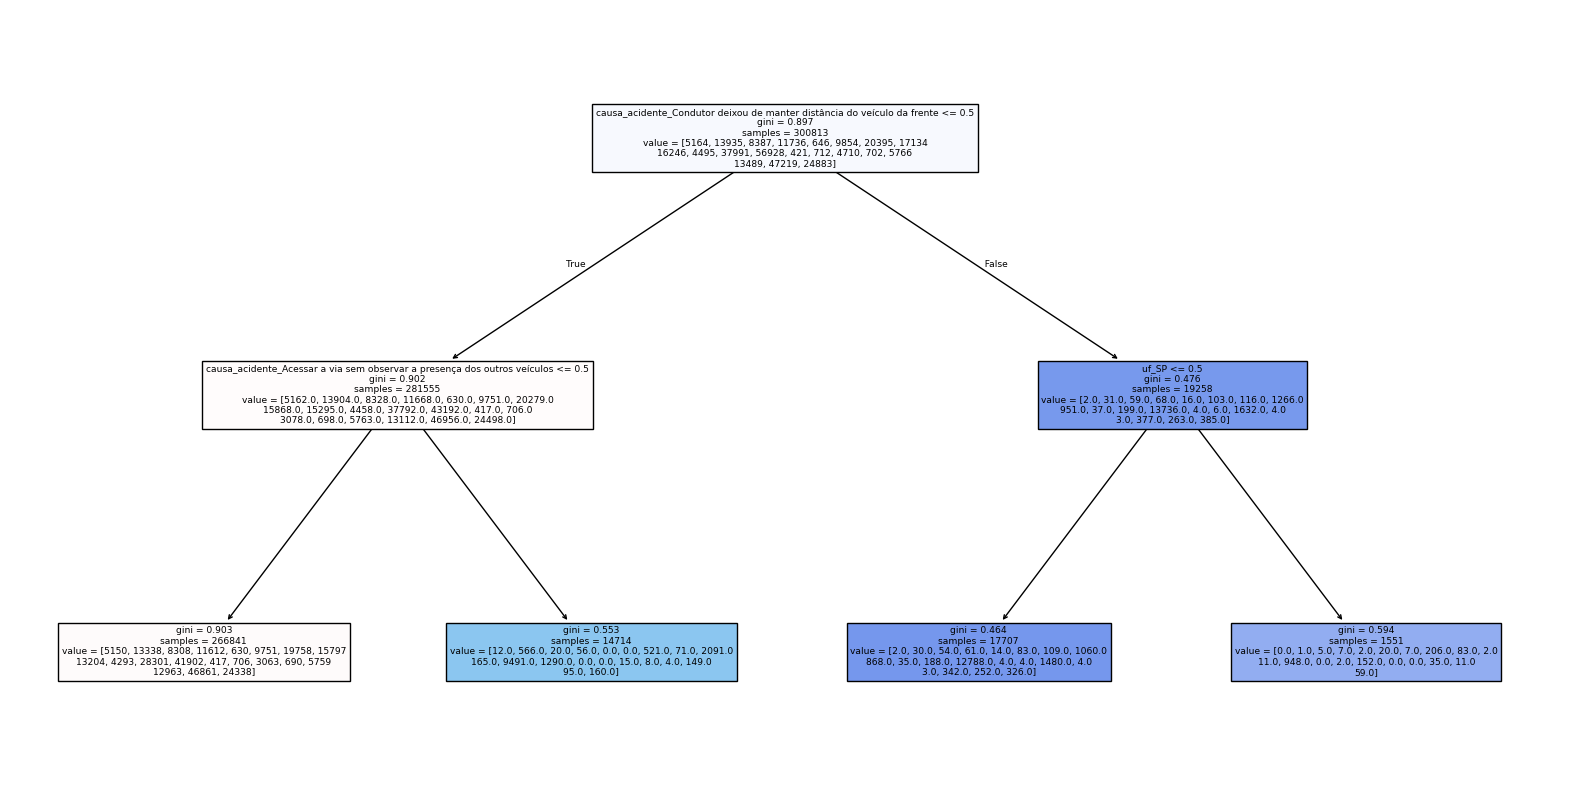

In [146]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=encoded_feature_names, filled=True)
plt.show()